# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [32]:
# Importing necessary items
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the data
!pip install palmerpenguins
import palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Dropping the rows in the dataframe that have missing values
penguins = penguins.dropna()

# Using get_dummies to convert categorical data into dummy variables
penguins = pd.get_dummies(penguins)

# Using the "* 1" to change the true/falses of dummy variables into numbers
penguins = penguins * 1

# Seeing what dataset looks like now
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


In [4]:
# Identifying X and y
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## **BEST TWO LINEAR MODELS from before**

### **First linear model**

In [5]:
#Making a linear model from before
X = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male"]]
y = penguins["bill_depth_mm"] #this is the target

body3_model = LinearRegression()
body3_model.fit(
    X=X,
    y=y
)

LinearRegression()

In [6]:
# using cross val to find rmse
body3_scores = cross_val_score(body3_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
body3_scores
linearmodel3meanscore = -np.mean(body3_scores)
linearmodel3meanscore

np.float64(1.2158117724408708)

### **Second Linear Regression Model**

In [7]:
X = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"] #this is the target

body4_model = LinearRegression()
body4_model.fit(
    X=X,
    y=y
)

LinearRegression()

In [8]:
# using cross val to find rmse
body4_scores = cross_val_score(body4_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
body4_scores
linearmodel4meanscore = -np.mean(body4_scores)
linearmodel4meanscore

np.float64(0.8565604098733935)

## **TWO KNN MODELS (for different values of K)**

First, I am using gridsearch to see which values of neighbors gives the best model.

In [9]:
# Identifying X and y
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

In [10]:
# creating a KNN pipeline
KNNpipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_regression", KNeighborsRegressor())]
).set_output(transform="pandas")

n_neighbors = {'KNN_regression__n_neighbors': np.arange(1, 11, 1)}

gscv = GridSearchCV(KNNpipeline, param_grid=n_neighbors, cv = 5, scoring='r2')

In [11]:
# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# Neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_regression__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011094,0.003670,0.007420,0.001677,1,{'KNN_regression__n_neighbors': 1},-0.275033,-0.142838,0.678710,0.574969,0.474393,0.262040,0.392175,10
1,0.006680,0.000365,0.005698,0.001351,2,{'KNN_regression__n_neighbors': 2},-0.131477,0.235676,0.742294,0.645254,-0.064402,0.285469,0.356894,9
2,0.011956,0.001613,0.008906,0.000689,3,{'KNN_regression__n_neighbors': 3},0.031285,0.250029,0.739983,0.661904,0.056193,0.347879,0.299080,8
3,0.009754,0.000585,0.007519,0.000404,4,{'KNN_regression__n_neighbors': 4},0.154498,0.177333,0.747428,0.633394,0.216505,0.385831,0.252070,2
4,0.009696,0.000311,0.007438,0.000490,5,{'KNN_regression__n_neighbors': 5},0.153211,0.058699,0.747874,0.617600,0.299897,0.375456,0.265618,4
5,0.009587,0.000142,0.007128,0.000150,6,{'KNN_regression__n_neighbors': 6},0.130560,0.013324,0.752021,0.589197,0.313136,0.359648,0.276128,6
6,0.009916,0.000263,0.007764,0.000349,7,{'KNN_regression__n_neighbors': 7},0.165259,-0.035502,0.742704,0.583668,0.288648,0.348955,0.281182,7
7,0.008064,0.001721,0.006017,0.001475,8,{'KNN_regression__n_neighbors': 8},0.192865,0.017425,0.740161,0.594187,0.312449,0.371417,0.263160,5
8,0.006193,0.000351,0.004856,0.000315,9,{'KNN_regression__n_neighbors': 9},0.196231,0.056156,0.737362,0.603735,0.323578,0.383412,0.252799,3
9,0.006608,0.000965,0.005402,0.001377,10,{'KNN_regression__n_neighbors': 10},0.183319,0.187332,0.735600,0.599570,0.360941,0.413352,0.221480,1


### **FIRST MODEL FOR KNN**

In [12]:
# creating a KNN pipeline
KNNpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_regression", KNeighborsRegressor(n_neighbors = 10))]
).set_output(transform="pandas")

KNNpipeline1

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_regression', KNeighborsRegressor(n_neighbors=10))])

In [13]:
#Fitting the data to this best pipeline
KNNpipeline1_fitted = KNNpipeline1.fit(X, y)
KNNpipeline1_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_regression', KNeighborsRegressor(n_neighbors=10))])

In [14]:
# Using cross val to find KNNmodel1 scores for RMSE
KNNmodel1scores = cross_val_score(KNNpipeline1, X, y, cv=5, scoring='neg_root_mean_squared_error')
KNNmodel1scores

array([-1.11626376, -1.05525197, -0.74394471, -0.7023726 , -0.9068385 ])

In [15]:
# printing the RMSE for KNN model 1
KNNModel1meanscore = -np.mean(KNNmodel1scores)
KNNModel1meanscore

np.float64(0.9049343071039239)

### **SECOND MODEL FOR KNN**

In [16]:
# creating a KNN pipeline when k = 4
KNNpipeline2 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_regression", KNeighborsRegressor(n_neighbors = 4))]
).set_output(transform="pandas")

KNNpipeline2

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_regression', KNeighborsRegressor(n_neighbors=4))])

In [17]:
#Fitting the data to this pipeline
KNNpipeline2_fitted = KNNpipeline2.fit(X, y)
KNNpipeline2_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNN_regression', KNeighborsRegressor(n_neighbors=4))])

In [18]:
# Using cross val to find KNNmodel2 scores for RMSE
KNNmodel2scores = cross_val_score(KNNpipeline2, X, y, cv=5, scoring='neg_root_mean_squared_error')
KNNmodel2scores

array([-1.13578988, -1.06172382, -0.72711349, -0.67205446, -1.00410144])

In [19]:
# printing the RMSE for KNN model 2
KNNModel2meanscore = -np.mean(KNNmodel2scores)
KNNModel2meanscore

np.float64(0.920156617601835)

## **Decision Tree Model**

In [20]:
dt_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeRegressor())]
)

dt_pipeline

tuning = {'decision_tree__ccp_alpha': np.arange(1, 5, 1)}

gscv = GridSearchCV(dt_pipeline, param_grid=tuning, cv = 5, scoring='neg_root_mean_squared_error')

In [21]:
# fitting on to the data
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

# Neatly showing the results
df_cv_results_ = pd.DataFrame(gscv_fitted.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013762,0.003811,0.005206,0.001012,1,{'decision_tree__ccp_alpha': 1},-1.272492,-1.182867,-1.109468,-1.042161,-1.135973,-1.148592,0.076868,1
1,0.010987,0.000989,0.004563,0.000197,2,{'decision_tree__ccp_alpha': 2},-1.272492,-1.182867,-2.797550,-1.042161,-1.135973,-1.486209,0.659871,2
2,0.010501,0.000294,0.004918,0.000563,3,{'decision_tree__ccp_alpha': 3},-2.160297,-1.796767,-2.797550,-2.558374,-1.925256,-2.247649,0.377837,3
3,0.010672,0.000155,0.004767,0.000093,4,{'decision_tree__ccp_alpha': 4},-2.160297,-1.796767,-2.797550,-2.558374,-1.925256,-2.247649,0.377837,3


### **FIRST MODEL FOR DECISION TREES**

In [22]:
dt_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeRegressor(max_depth=2))]      #says " when it fits decision tree, it will go one branch deep"
)

dt_pipeline

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeRegressor(max_depth=2))])

In [23]:
#Fitting the data to this pipeline
dt_pipeline_fitted = dt_pipeline.fit(X, y)
dt_pipeline_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('decision_tree', DecisionTreeRegressor(max_depth=2))])

In [24]:
# Using cross val to find decision tree scores for RMSE
dtmodelscores = cross_val_score(dt_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
dtmodelscores

array([-1.03276123, -0.9142615 , -0.86199802, -0.7393995 , -0.77938103])

In [25]:
# printing the RMSE for decision tree model
dtmodelmeanscore = -np.mean(dtmodelscores)
dtmodelmeanscore

np.float64(0.8655602547084575)

## **CREATING A GRAPH TO SEE WHICH IS BEST**

First, I am splitting the data.

In [38]:
# taking the data set we have and splitting it into two sets (putting 25% in test set)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins.drop(['bill_depth_mm'], axis=1), penguins['bill_depth_mm'], test_size=0.25, random_state = 321)

Now I will train and test each model on the split.

**LINEAR MODEL 1**

In [45]:
#splitting the data
X = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male"]]
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

#fitting the model on the training data
body3_model = LinearRegression()
body3_model.fit(X_train, y_train)

#predicting on both training and test sets
y_train_pred = body3_model.predict(X_train)
y_test_pred = body3_model.predict(X_test)

#finding RMSE for each
linear1train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
linear1test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#showing results
print("Linear 1 Training RMSE:", linear1train_rmse)
print("Linear 1 Test RMSE:", linear1test_rmse)


Linear 1 Training RMSE: 1.1831983313632553
Linear 1 Test RMSE: 1.0671536770587065


**LINEAR MODEL 2**

In [44]:
#splitting the data
X = penguins[["body_mass_g", "flipper_length_mm", "sex_female", "sex_male", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

#fitting the model on the training data
body4_model = LinearRegression()
body4_model.fit(X_train, y_train)

#predicting on both training and test sets
y_train_pred = body4_model.predict(X_train)
y_test_pred = body4_model.predict(X_test)

#finding RMSE for each
linear2train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
linear2test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#showing results
print("Linear 2 Training RMSE:", linear2train_rmse)
print("Linear 2 Test RMSE:", linear2test_rmse)


Linear 2 Training RMSE: 0.7849616030961727
Linear 2 Test RMSE: 0.8274243042616907


**KNN MODEL 1**

In [46]:
# creating a KNN pipeline
KNNpipeline1 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_regression", KNeighborsRegressor(n_neighbors = 10))]
).set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

#fitting the model on the training data
KNNpipeline1_fitted = KNNpipeline1.fit(X_train, y_train)


#predicting on both training and test sets
y_train_pred = KNNpipeline1.predict(X_train)
y_test_pred = KNNpipeline1.predict(X_test)

#finding RMSE for each
KNN1train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
KNN1test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#showing results
print("KNN1 Training RMSE:", KNN1train_rmse)
print("KNN1 Test RMSE:", KNN1test_rmse)


KNN1 Training RMSE: 0.7833795594324287
KNN1 Test RMSE: 0.8238007156148989


**KNN MODEL 2**

In [47]:
# creating a KNN pipeline when k = 4
KNNpipeline2 = Pipeline(
  [("standardize", StandardScaler()),
  ("KNN_regression", KNeighborsRegressor(n_neighbors = 4))]
).set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

#fitting the model on the training data
KNNpipeline2_fitted = KNNpipeline2.fit(X_train, y_train)


#predicting on both training and test sets
y_train_pred = KNNpipeline2.predict(X_train)
y_test_pred = KNNpipeline2.predict(X_test)

#finding RMSE for each
KNN2train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
KNN2test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#showing results
print("KNN1 Training RMSE:", KNN2train_rmse)
print("KNN1 Test RMSE:", KNN2test_rmse)


KNN1 Training RMSE: 0.7571463414223945
KNN1 Test RMSE: 0.8782422922004631


**DT MODEL**

In [48]:
dt_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("decision_tree", DecisionTreeRegressor(max_depth=2))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

#fitting the model on the training data
dt_pipeline_fitted = dt_pipeline.fit(X_train, y_train)


#predicting on both training and test sets
y_train_pred = dt_pipeline.predict(X_train)
y_test_pred = dt_pipeline.predict(X_test)

#finding RMSE for each
dttrain_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
dttest_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

#showing results
print("dt Training RMSE:", dttrain_rmse)
print("dt Test RMSE:", dttest_rmse)



dt Training RMSE: 1.0288823995626777
dt Test RMSE: 0.8153936774495877


**THE PLOT**

In [51]:
results = [
    {"Model": "Linear 1", "Type": "Train RMSE", "RMSE": linear1train_rmse},
    {"Model": "Linear 1", "Type": "Test RMSE", "RMSE": linear1test_rmse},
    {"Model": "Linear 2", "Type": "Train RMSE", "RMSE": linear2train_rmse},
    {"Model": "Linear 2", "Type": "Test RMSE", "RMSE": linear2test_rmse},
    {"Model": "KNN 1", "Type": "Train RMSE", "RMSE": KNN1train_rmse},
    {"Model": "KNN 1", "Type": "Test RMSE", "RMSE": KNN1test_rmse},
    {"Model": "KNN 2", "Type": "Train RMSE", "RMSE": KNN2train_rmse},
    {"Model": "KNN 2", "Type": "Test RMSE", "RMSE": KNN2test_rmse},
    {"Model": "DT", "Type": "Train RMSE", "RMSE": dttrain_rmse},
    {"Model": "DT", "Type": "Test RMSE", "RMSE": dttest_rmse},
]

#converting to DataFrame
rmse_df = pd.DataFrame(results)

#showing the DataFrame
print(rmse_df)


      Model        Type      RMSE
0  Linear 1  Train RMSE  1.183198
1  Linear 1   Test RMSE  1.067154
2  Linear 2  Train RMSE  0.784962
3  Linear 2   Test RMSE  0.827424
4     KNN 1  Train RMSE  0.783380
5     KNN 1   Test RMSE  0.823801
6     KNN 2  Train RMSE  0.757146
7     KNN 2   Test RMSE  0.878242
8        DT  Train RMSE  1.028882
9        DT   Test RMSE  0.815394


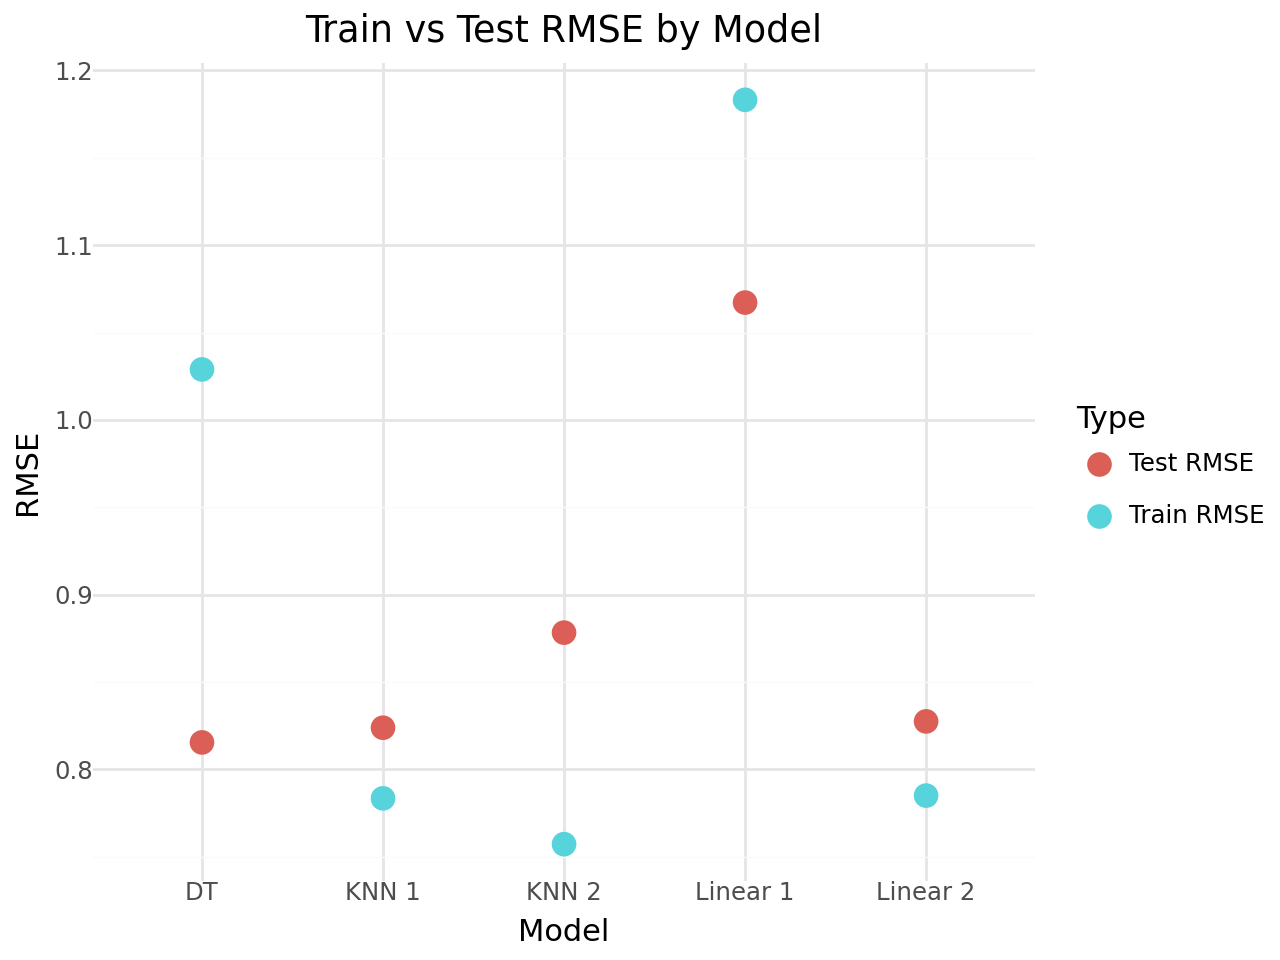

In [52]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

(
    ggplot(rmse_df, aes(x='Model', y='RMSE', color='Type')) +
    geom_point(size=4) +
    labs(
        title="Train vs Test RMSE by Model",
        x="Model",
        y="RMSE"
    ) +
    theme_minimal()
)


The first KNN model seems to have been the best.